In [57]:
import pandas as pd
import seaborn as sns

In [58]:
do_random = False
if do_random:
    df_in = pd.read_csv("result_random_splits.csv")
    split_type = "RND" 
    split_name = "Random Split"
else:
    df_in = pd.read_csv("result_scaffold_splits.csv")
    split_type = "SCAF" 
    split_name = "Scaffold Split"

Split datasets into SI and MI

In [59]:
df_si = df_in.query("Method == '3D/SI/Net'").copy().reindex()
df_mi = df_in.query("Method == '3D/MI/Bag-AttentionNet'").copy().reindex()

Reshape datasets

In [60]:
combo_df = df_si[['Dataset','R2']]
combo_df['mi'] = df_mi['R2'].values

In [61]:
combo_df.columns = ['dataset','3D/SI/Net','3D/MI/Bag-AttentionNet']

In [62]:
combo_df

,dataset,3D/SI/Net,3D/MI/Bag-AttentionNet
0,A2a.smi,0.02,0.33
2,A2a.smi,0.33,0.49
4,A2a.smi,-0.48,0.31
6,A2a.smi,-2.81,-1.45
8,A2a.smi,0.01,0.17
...,...,...,...
410,opioid.smi,0.24,0.35
412,opioid.smi,0.14,0.44
414,opioid.smi,0.07,0.39
416,opioid.smi,0.23,0.48


In [63]:
combo_df['split'] = [f"{split_type}_{x:02d}" for x in range(0,10)]*21
combo_df['dataset'] = [x.replace(".smi","") for x in combo_df.dataset]

In [64]:
combo_df

,dataset,3D/SI/Net,3D/MI/Bag-AttentionNet,split
0,A2a,0.02,0.33,SCAF_00
2,A2a,0.33,0.49,SCAF_01
4,A2a,-0.48,0.31,SCAF_02
6,A2a,-2.81,-1.45,SCAF_03
8,A2a,0.01,0.17,SCAF_04
...,...,...,...,...
410,opioid,0.24,0.35,SCAF_05
412,opioid,0.14,0.44,SCAF_06
414,opioid,0.07,0.39,SCAF_07
416,opioid,0.23,0.48,SCAF_08


Add data from Guassian Process, XGBoost, and FFNN

In [65]:
cmp_df = pd.read_csv("comparison.csv")

In [66]:
cmp_df = cmp_df.merge(combo_df,on=["dataset","split"]).drop([x for x in cmp_df.columns if x.endswith("rmse")],axis=1)

Reshape the data for boxplots

In [67]:
melt_df = cmp_df.melt(id_vars=["dataset","split"])

In [68]:
melt_df.columns = ["Dataset","split","method","R2"]

In [69]:
sns.set(rc={'figure.figsize': (15, 15)})
sns.set(font_scale=1.5)

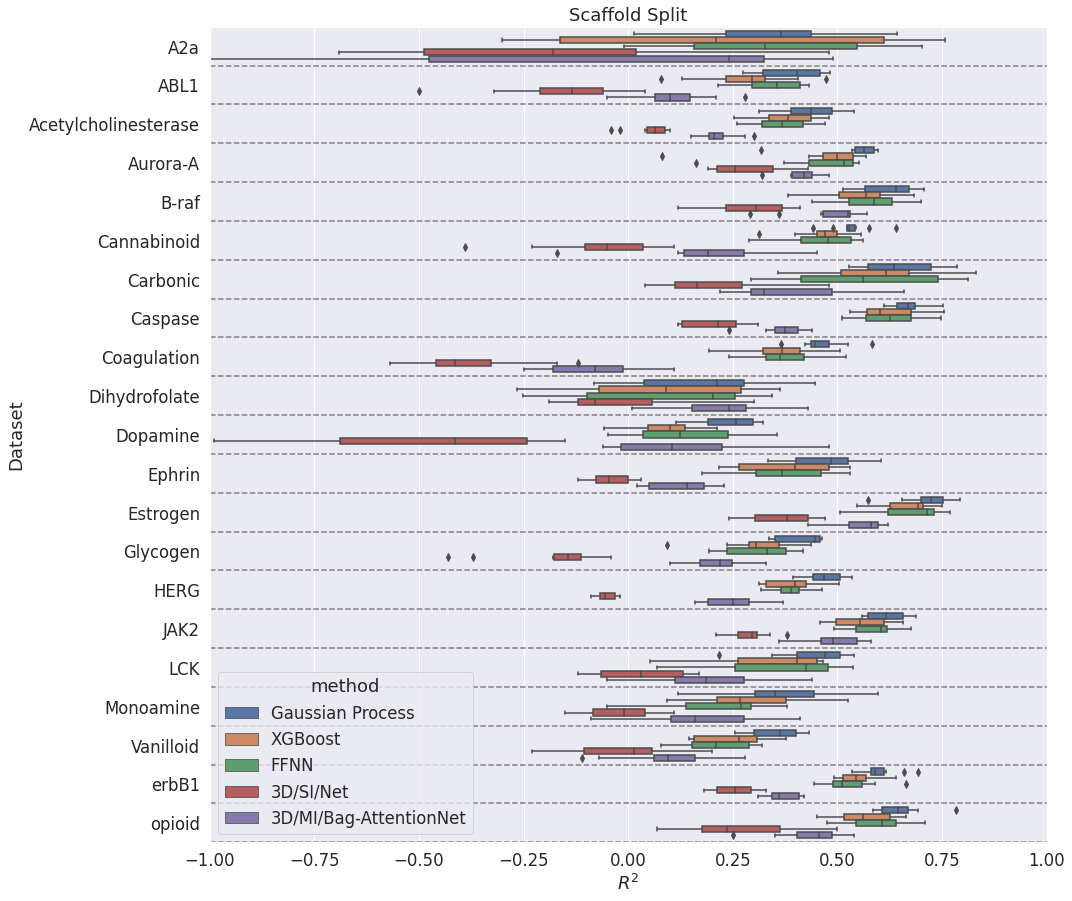

In [70]:
ax = sns.boxplot(x="R2",y="Dataset",data=melt_df,hue="method",orient="h")
for i in range(0,len(melt_df.Dataset.unique())):
    ax.axhline(0.5+i,linestyle="--",color="grey")
ax.set_title(split_name)
ax.set(xlabel="$R^2$")
ax.set(xlim=[-1,1]);

In [71]:
cmp_df

,dataset,split,Gaussian Process,XGBoost,FFNN,3D/SI/Net,3D/MI/Bag-AttentionNet
0,A2a,SCAF_00,0.012976,-0.301353,-0.009199,0.02,0.33
1,A2a,SCAF_01,0.374401,0.386379,0.179652,0.33,0.49
2,A2a,SCAF_02,0.597798,0.757998,0.702588,-0.48,0.31
3,A2a,SCAF_03,0.287627,-0.280969,0.354050,-2.81,-1.45
4,A2a,SCAF_04,0.642142,0.685189,0.680285,0.01,0.17
...,...,...,...,...,...,...,...
205,opioid,SCAF_05,0.640667,0.520661,0.603940,0.24,0.35
206,opioid,SCAF_06,0.784424,0.603436,0.709108,0.14,0.44
207,opioid,SCAF_07,0.640238,0.557889,0.566575,0.07,0.39
208,opioid,SCAF_08,0.589945,0.512827,0.474636,0.23,0.48


In [72]:
csv_name = split_name.replace(" ","_")
cmp_df.to_csv(f"{csv_name}.csv",index=False)